## Import the necessary libraries

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial import distance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Hierarchical Cluster and Distance matric function

In [2]:
def hac(k, matrix, gen_id):
    clusters = gen_id
    while(len(clusters) != k):
    ## Calculating the minimum value and its index 
        minimum = float('inf')
        rows,columns = matrix.shape
        for i in range(0, rows):
            for j in range(0, columns):
                if(i != j):
                    if(matrix[i][j] < minimum):
                        minimum = matrix[i][j]
                        m,n = min(i,j),max(i,j)
                        
    ### Updating the distance matrix with the clusters

        clusters[m] = str(clusters[m]) +':'+ str(clusters[n])
        
        for i in range(0, len(matrix)):
            matrix[m][i] = matrix[i][m] =  min(matrix[m][i], matrix[n][i])
            
        matrix = np.delete(matrix, n, 0)
        matrix = np.delete(matrix, n, 1)
        del clusters[n]
    return clusters

## Calculate the Jaccard and Rand Index

In [3]:
def jaccard_rand(predicted, ground):
    length = len(predicted) 
    predicted_matrix = np.zeros((length, length))
    ground_matrix = np.zeros((length, length))
    
    ## Ground truth and Predicted matrix
    for i in range(length):
        for j in range(length):
            if predicted[i]==predicted[j]:
                predicted_matrix[i][j]=1
            if ground[i]==ground[j]:
                ground_matrix[i][j] = 1
                
    ## Calculating the agree and disagree value for jaccard and rand
            
    m00,m01,m10,m11 = 0,0,0,0
    for i in range(length):
        for j in range(length):
            if predicted_matrix[i][j]+ground_matrix[i][j]==2:
                m11 +=1
            elif predicted_matrix[i][j]+ground_matrix[i][j]==0:
                m00 +=1
            elif predicted_matrix[i][j]==0 and ground_matrix[i][j]==1:
                m01 +=1
            elif predicted_matrix[i][j]==1 and ground_matrix[i][j]==0:
                m10 +=1
                
    ## Calculating jaccard and rand index
    jaccard = float(m11)/(m11 + m10 + m01)
    rand = float(m11 + m00) / (m11 + m10 + m01 + m00)

    return jaccard, rand

    

## Plot the Principal components

In [4]:
def plot_pca(predicted_clusters,X):
    pca = PCA(n_components=2)
    pca.fit(X)
    x_pca = pca.transform(X)
    pca_x = pd.DataFrame(x_pca,columns=['pc_1','pc_2'])
    pca_x['clusters'] = predicted_clusters
    sns.set_style('darkgrid')
    sns.lmplot(x = 'pc_1',y='pc_2',data = pca_x,hue='clusters',fit_reg=False,size=7,aspect=1)
    plt.title('Heirarchical Agglomerative Clustering')
    plt.show()
    

## Input Code

The clusters formed are as below
[['1', '2', '3'], ['4', '5', '6']]


Jaccard value :1.0
Rand Index value :1.0


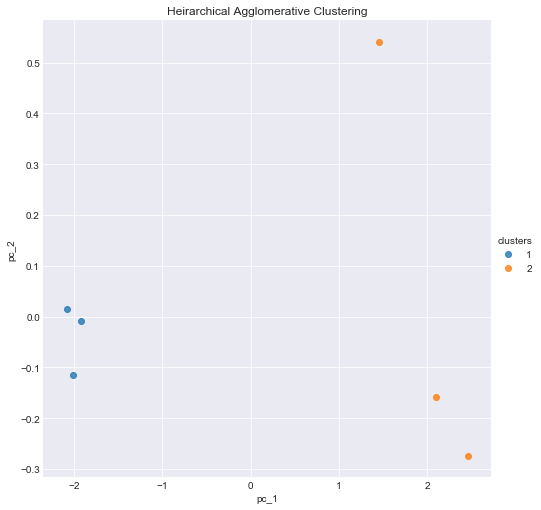

In [5]:

## Read the data define the values
k_value = 2
data = pd.read_csv('new_dataset_2.txt', sep='\t', header=None)
gene = list(data[0].values)
ground_truth = list(data[1].values)
X = data.drop([0,1],axis=1).values

## Calculating the distance matrix using Euclideand distance
r = X.shape[0]
distance_matrix = np.zeros((r, r), dtype='float64')
for i in range(r):
    for j in range(r):
        if i!=j:
            distance_matrix[i][j] = distance.euclidean(X[i],X[j])

## Finding the Clusters using HAC
clusters = np.array(hac( k_value, distance_matrix, gene))
predicted_clusters = list(range(r))
cluster_split = []
for index in clusters:
    cluster_split.append(index.split(':'))
print('The clusters formed are as below')
print(cluster_split)

### Assinging the clusters to the indivial rows
for i in range(len(cluster_split)):
    for v in cluster_split[i]:
        predicted_clusters[int(v)-1] = i+1
        
## Calculating Jaccard and Rand Index      
jaccard , rand = jaccard_rand(predicted_clusters,ground_truth)
print('\n')
print('Jaccard value :'+ str(jaccard))
print('Rand Index value :'+ str(rand))

## Plotting the Principal components
plot_pca(predicted_clusters,X)





                
